# Lab 5 - self practice

## Objectives 
- understand how to compute covariance matrix from data
- and how to compute eigen-vectors and eigen-values

### Generating data ###

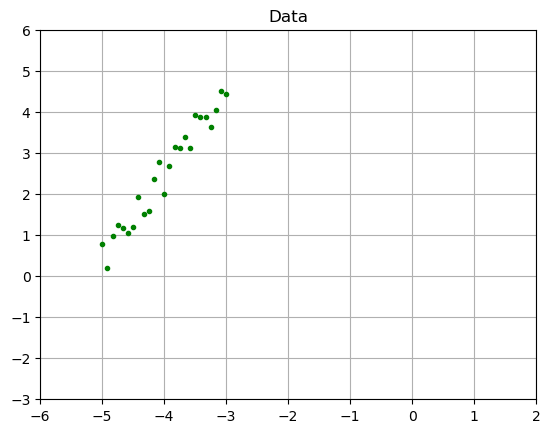

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles

# N is a sample size
N = 25
# we can fix a random seed. It allows us to get the same data
np.random.seed(10)
# form our data
x = np.linspace(-5, -3, N)
y = 10 + 2*x + np.random.random(size=(N,))
data = np.stack([x,y], axis = 1)


plt.title("Data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.axis([-6, 2, -3, 6])
plt.grid('True')


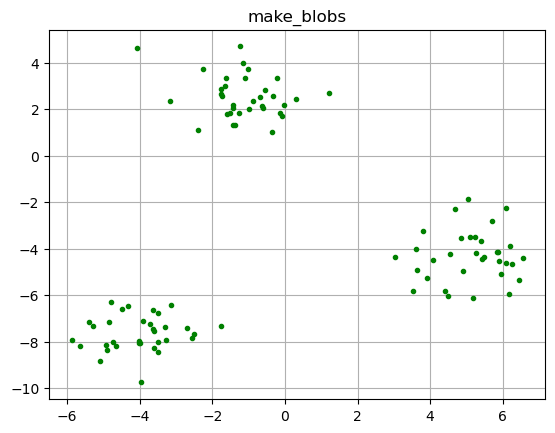

In [42]:
df_1 = make_blobs(n_samples=100, n_features=10, shuffle=True, random_state=None)



# print(df[0][:,0])
# print(df[0][:,1])

plt.figure()
plt.title("make_blobs")
plt.plot(df_1[0][:,0], df_1[0][:,1], '.', color="green")
plt.grid('True')


[[-4.64110985e+00 -8.20106688e+00  6.04649944e+00 -1.07179517e+01
   1.78151283e+00 -3.99541644e-01  5.05876555e+00 -7.21879615e+00
   6.06126932e+00 -4.11111350e+00]
 [ 6.18771117e+00 -3.87863398e+00  8.11010435e+00 -4.72158340e+00
  -6.38877946e+00 -2.33352623e+00 -7.47463885e+00  5.58354401e+00
  -8.46291033e+00 -1.94028324e+00]
 [-1.02351374e+00  3.72010630e+00 -1.04151096e+00  3.39394666e+00
   2.61794005e-01  5.55390487e+00  2.07156862e+00  7.85915720e+00
  -5.70219407e+00 -7.15003977e+00]
 [ 3.53858119e+00 -5.79940594e+00  6.68345999e+00 -3.67052765e+00
  -6.90115650e+00 -3.83260467e+00 -7.83796983e+00  6.81973936e+00
  -7.31561135e+00 -1.92095546e+00]
 [ 5.03235762e+00 -1.84543641e+00  6.38904695e+00 -2.51194782e+00
  -6.52613018e+00 -2.33430043e+00 -1.04555958e+01  5.29881763e+00
  -7.09718998e+00 -1.70820087e+00]
 [ 3.04218316e+00 -4.35389407e+00  8.26193035e+00 -4.89139949e+00
  -6.78468681e+00 -3.63951120e+00 -1.01795543e+01  5.57471717e+00
  -8.19452521e+00 -2.90069353e+00

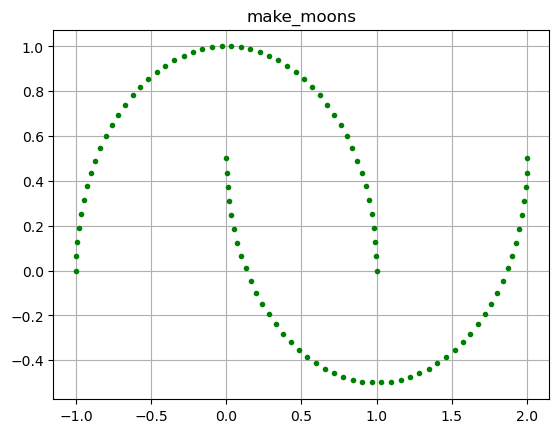

In [16]:
df_2 = make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)

plt.figure()
plt.title("make_moons")
plt.plot(df_2[0][:,0], df_2[0][:,1], '.', color="green")
plt.grid('True')



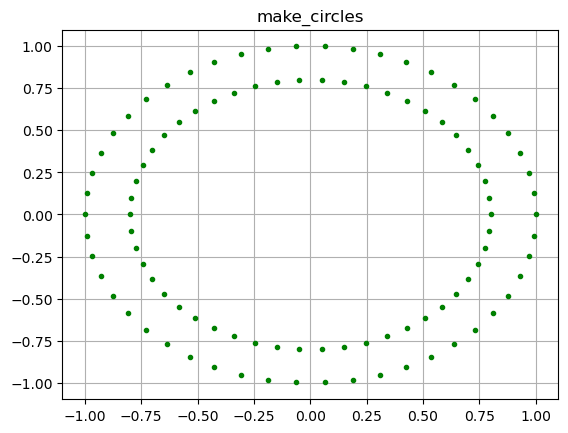

In [14]:
df_3 = make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)

plt.figure()
plt.title("make_circles")
plt.plot(df_3[0][:,0], df_3[0][:,1], '.', color="green")
plt.grid('True')

### Center data

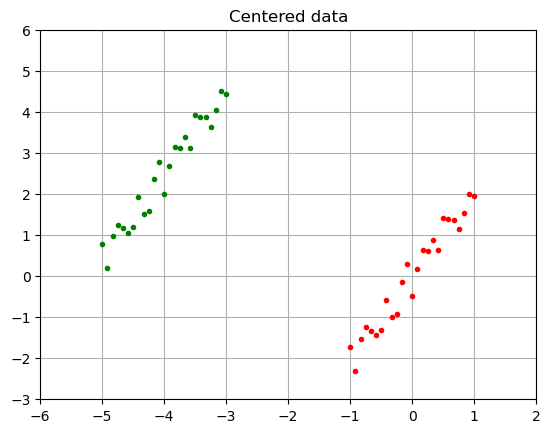

In [20]:
# center data by subtracting mean value from each feature
# pay attention to mean_vector <-- we need it later for restoring our data
# write 2 lines below

# your code here
mean_vector =  np.mean(data, axis=0)
data_centered = data - mean_vector

plt.title("Centered data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="red")
plt.axis([-6, 2, -3, 6])
plt.grid('True')

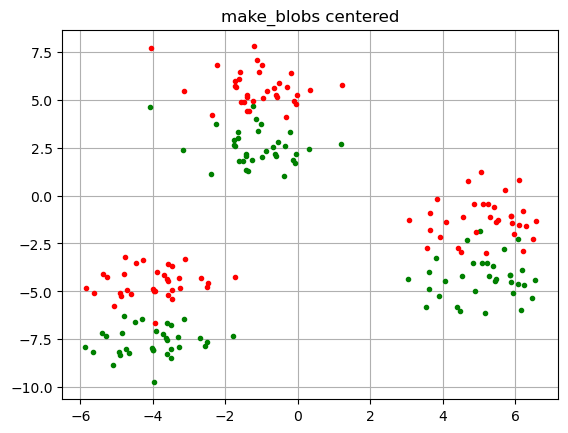

In [45]:
mean_vector_1 =  np.mean(df_1[0], axis=0)

df_1_centered = df_1[0] - mean_vector_1

plt.figure()
plt.title("make_blobs centered")
plt.plot(df_1[0][:,0], df_1[0][:,1], '.', color="green")
plt.plot(df_1_centered[:,0], df_1_centered[:,1], '.', color="red")
plt.grid('True')

### Covariance matrix

In [27]:
# calculate covariance matrix for our centered data

# your code here
cov_mat = np.cov(data_centered.T)
print('Covariance matrix:\n', cov_mat)

# Cov(x, y) = (1 / (n - 1)) * Sum_i(x_i * y_i)
# also, to make sure you understand how to calculate covariance, calculate and print cov(X,Y)
# check that it is the same as in the covariance matrix

# your code here
cov_xy = np.sum(data_centered[:,0] * data_centered[:,1]) / (N - 1)
print('cov(X,Y):', cov_xy)

Covariance matrix:
 [[0.37615741 0.76801889]
 [0.76801889 1.65019543]]
cov(X,Y): 0.7680188927863001


In [46]:
cov_mat_1 = np.cov(df_1_centered.T)

print('Covariance matrix make_blobs:\n', cov_mat_1)

cov_xy_1 = np.sum(df_1_centered[:,0] * df_1_centered[:,1]) / (N - 1)
print('cov(X,Y) make_blobs:', cov_xy_1)


Covariance matrix make_blobs:
 [[ 15.46861728   1.78347884   4.86305374   4.80244633 -15.36227071
   -7.70067962 -22.34052983  15.98156622 -20.40877979   3.15860805]
 [  1.78347884  19.06830826 -12.96603523  21.82100102   3.4489161
   11.74857425  -5.25507353  22.13930269 -15.48346344 -10.00003069]
 [  4.86305374 -12.96603523  12.56689499 -14.20605361  -9.10442226
  -11.93903416  -5.47365983  -9.97370773   3.23262163   8.71694099]
 [  4.80244633  21.82100102 -14.20605361  27.50656029   1.44172887
   12.36476154 -10.17381877  28.81635931 -21.86301527 -11.2243041 ]
 [-15.36227071   3.4489161   -9.10442226   1.44172887  18.75704806
   11.6732861   22.73378226 -10.64463033  17.71308118  -6.42256834]
 [ -7.70067962  11.74857425 -11.93903416  12.36476154  11.6732861
   13.6287613    9.95079896   5.89671276   1.54101377  -8.99377377]
 [-22.34052983  -5.25507353  -5.47365983 -10.17381877  22.73378226
    9.95079896  35.44813184 -27.01257726  32.99204864  -3.22985945]
 [ 15.98156622  22.1393026

### Eigenvectors and eigenvalues

In [31]:
# compute eigenvectors and eigenvalues, print them

# your code here
eig_values, eig_vectors = np.linalg.eig(cov_mat)
print('eig_values:', eig_values)
print('eig_vectors:\n', eig_vectors)


# are they already in the needed order?
# if not, order eigenvectors and eigenvalues by eigenvalues, descending

idxs = eig_values.argsort()[::-1]
eig_values = eig_values[idxs]

eig_vectors = eig_vectors[:, idxs]


print('\nsorteed eig_values:', eig_values)
print('sorted eig_vectors:\n', eig_vectors)

# estimate variance retained by each principal component
retained_var = eig_values / np.sum(eig_values)
print('\nretained variance:',   retained_var)

eig_values: [0.01535567 2.01099716]
eig_vectors:
 [[-0.90509952 -0.42519979]
 [ 0.42519979 -0.90509952]]

sorteed eig_values: [2.01099716 0.01535567]
sorted eig_vectors:
 [[-0.42519979 -0.90509952]
 [-0.90509952  0.42519979]]

retained variance: [0.99242201 0.00757799]


In [47]:
eig_values_1, eig_vectors_1 = np.linalg.eig(cov_mat_1)
print('eig_values make_blobs:', eig_values_1)
print('eig_vectors make_blobs:\n', eig_vectors_1)

idxs_1 = eig_values_1.argsort()[::-1]
eig_values_1 = eig_values_1[idxs_1]
eig_vectors_1 = eig_vectors_1[:, idxs_1]

retained_var_1 = eig_values_1 / np.sum(eig_values_1)

eig_values make_blobs: [143.24657961  79.33946965   1.34734445   0.62598917   0.67317161
   0.74455415   1.12465863   1.03243108   0.9998007    0.94288439]
eig_vectors make_blobs:
 [[-0.25482321 -0.26209619  0.20604259 -0.11200301 -0.43288105  0.67380204
  -0.3613956   0.1967558  -0.02473875 -0.00675781]
 [-0.2469449   0.34897379  0.08330796 -0.17357863  0.51999028  0.38870369
   0.20026041  0.1633912   0.04118541  0.53869115]
 [ 0.07853101 -0.37080453  0.39664657 -0.3934779   0.46716338 -0.09834487
   0.01517921  0.31231668 -0.285034   -0.37047764]
 [-0.33604576  0.36361968  0.58483989  0.17858582 -0.08548899 -0.26857437
  -0.06403899  0.20232755  0.45675678 -0.21867473]
 [ 0.20349629  0.38962043  0.17714226 -0.443639    0.076209    0.05360184
  -0.48622352 -0.57051588 -0.02466713 -0.08601814]
 [-0.01845782  0.4033805  -0.0907923  -0.52370742 -0.49235861 -0.14083398
   0.34093029  0.29740187 -0.2927806  -0.04216329]
 [ 0.4188263   0.34768717 -0.35102172  0.12498082  0.16966033  0.2332

### Project data ###

first_pc: [[-0.42519979]
 [-0.90509952]]


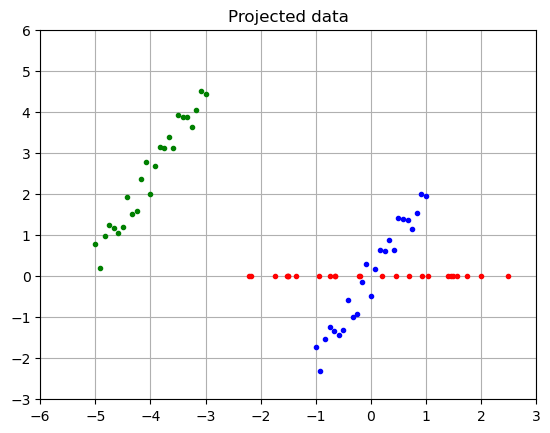

In [38]:
# project data to the first principal component
first_pc = eig_vectors[:, :1]

print('first_pc:', first_pc)


projected_data = np.dot(data_centered, first_pc)

plt.title("Projected data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(projected_data, np.zeros(len(projected_data)), '.', color="red")
plt.axis([-6, 3, -3, 6])
plt.grid('True')

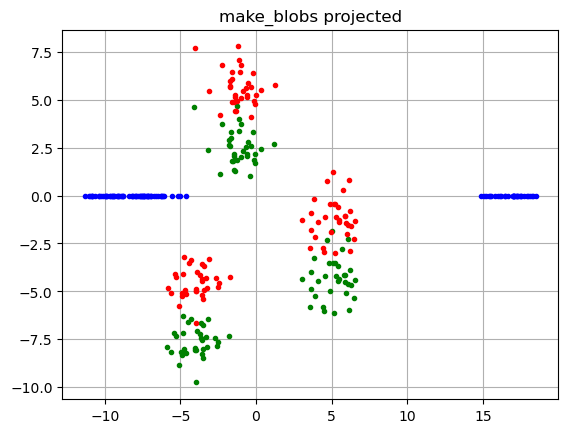

In [51]:
first_pc_1 = eig_vectors_1[:, :1]

# print('first_pc make_blobs:', first_pc_1)

projected_data_1 = np.dot(df_1_centered, first_pc_1)

plt.figure()
plt.title("make_blobs projected")
plt.plot(df_1[0][:,0], df_1[0][:,1], '.', color="green")
plt.plot(df_1_centered[:,0], df_1_centered[:,1], '.', color="red")
plt.plot(projected_data_1, np.zeros(len(projected_data_1)), '.', color="blue")
plt.grid('True')



### Restore data back ###

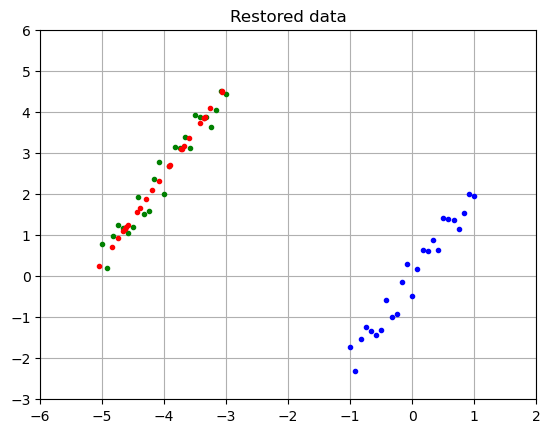

In [39]:
# Projected_data . first_pc.T + means
# project data back to initial space
# remember to add a mean_vector to the restored data

restored_data = np.dot(projected_data, first_pc.T) + mean_vector

plt.title("Restored data")
plt.plot(data[:,0], data[:,1], '.', color="green")
plt.plot(data_centered[:,0], data_centered[:,1], '.', color="blue")
plt.plot(restored_data[:,0], restored_data[:,1], '.', color="red")
plt.axis([-6, 2, -3, 6])
plt.grid('True')
plt.show()